In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#### Grades Table

In [ ]:
BASE_PATH = "/Users/hashamulhaq/Downloads/dataset/dataset/"

grades_df = pd.read_csv(f"{BASE_PATH}/education/grades.csv")
grades_df.columns = grades_df.columns.str.strip()
grades_df['uid'] = grades_df['uid'].str.strip()
print (grades_df.shape)
print (grades_df.describe())
grades_df.head()

(30, 4)
         gpa all    gpa 13s      cs 65
count  30.000000  30.000000  30.000000
mean    3.421533   3.330556   3.622222
std     0.397754   0.798284   0.796224
min     2.400000   1.000000   0.000000
25%     3.257000   3.333333   3.666667
50%     3.490500   3.527778   4.000000
75%     3.698500   3.861111   4.000000
max     3.947000   4.000000   4.000000


,uid,gpa all,gpa 13s,cs 65
0,u01,2.863,1.777778,3.0
1,u02,3.505,4.000000,4.0
2,u04,3.029,3.500000,4.0
3,u05,3.679,3.777778,4.0
4,u07,3.474,4.000000,4.0


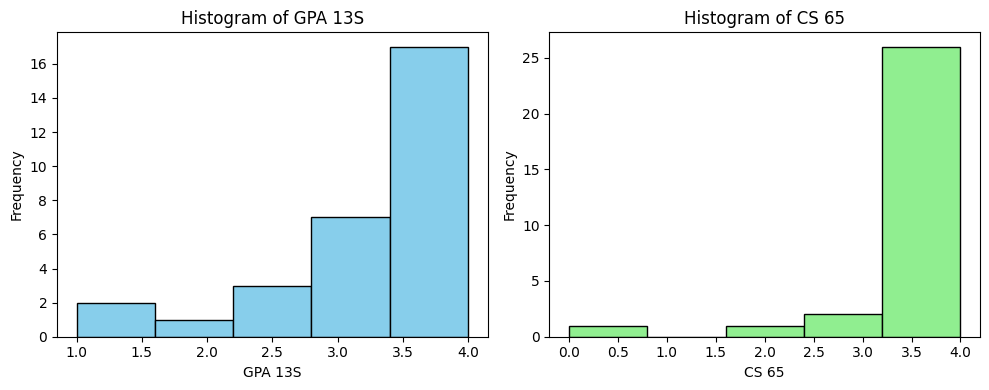

In [3]:
plt.figure(figsize=(10, 4))

# Histogram for 'gpa 13s'
plt.subplot(1, 2, 1)
plt.hist(grades_df['gpa 13s'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of GPA 13S')
plt.xlabel('GPA 13S')
plt.ylabel('Frequency')

# Histogram for 'cs 65'
plt.subplot(1, 2, 2)
plt.hist(grades_df['cs 65'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histogram of CS 65')
plt.xlabel('CS 65')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Calendar & Engagements

In [4]:
def get_column_stats(column):
    print ("min:", column.min(), " | max:", column.max(), " | nulls:", column.isna().sum())

def normalize_dates(date_series):
    # Try m/d/y first
    dates = pd.to_datetime(date_series, format='%m/%d/%Y', errors='coerce')
    
    mask = dates.isna()
    dates[mask] = pd.to_datetime(date_series[mask], format='%Y/%m/%d', errors='coerce')
    
    return dates


calendar_final_df = []
for fpaths in Path(f"{BASE_PATH}/calendar/").rglob('*.csv'):

    df = pd.read_csv(fpaths)
    df['DATE'] = normalize_dates(df["DATE"])
    #print (df["ACCOUNT_LABEL"].value_counts())

    #df["ACCOUNT_LABEL"].sum()
    calendar_final_df.append(
       { 'uid': str(fpaths).split("/")[-1].split("_")[-1].replace(".csv","").strip(),
            "total_calendar_events": df.shape[0]
       } 
    )

calendar_final_df = pd.DataFrame(calendar_final_df)
print (calendar_final_df.shape)
calendar_final_df.merge(grades_df, on=['uid'], how='inner').shape

(28, 2)


(20, 5)

In [ ]:
! ls /Users/hashamulhaq/Downloads/dataset/dataset/survey

# 1. Calendar has csv files
# |    | id                                      | device                               |   timestamp |   ACCOUNT_LABEL | DATE      | TIME   |
# |---:|:----------------------------------------|:-------------------------------------|------------:|----------------:|:----------|:-------|
# |  0 | 6a9d4195-9193-47f0-a674-59e19ee5b29a-29 | 1977b545-a88f-4903-a7ae-2c434de4be49 |  1364182283 |               1 | 3/24/2013 | 20:00  |

# 2. dining
# |    | 2013-01-06 17:42:49   | 53 Commons   | Supper    |
# |---:|:----------------------|:-------------|:----------|
# |  0 | 2013-01-07 09:32:57   | Novack Cafe  | Breakfast |

# 3. Sensing: 
# activity      bluetooth     dark          phonecharge   wifi
# audio         conversation  gps           phonelock     wifi_location

# 3.1 sensing/activity:
# |    |   timestamp |    activity inference |
# |---:|------------:|----------------------:|
# |  0 | 1.36436e+09 |                     0 |

# 3.2 sensing/bluetooth
# |    |       time | MAC               |   class_id |   level |
# |---:|-----------:|:------------------|-----------:|--------:|
# |  0 | 1364385773 | 68:A3:C4:49:61:9E |    4063500 |     -88 |

# 4. Survey:
# BigFive.csv              PHQ-9.csv                psqi.csv
# FlourishingScale.csv     PerceivedStressScale.csv vr_12.csv
# LonelinessScale.csv      panas.csv

# 5. app_usage
# |    | id                                      | device                               |   timestamp | RUNNING_TASKS_baseActivity_mClass                   | RUNNING_TASKS_baseActivity_mPackage   |   RUNNING_TASKS_id |   RUNNING_TASKS_numActivities |   RUNNING_TASKS_numRunning | RUNNING_TASKS_topActivity_mClass                    | RUNNING_TASKS_topActivity_mPackage   |
# |---:|:----------------------------------------|:-------------------------------------|------------:|:----------------------------------------------------|:--------------------------------------|-------------------:|------------------------------:|---------------------------:|:----------------------------------------------------|:-------------------------------------|
# |  0 | a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38 | 1977b545-a88f-4903-a7ae-2c434de4be49 |  1364100683 | com.google.android.gm.ConversationListActivityGmail | com.google.android.gm                 |                256 |                             1 |                          1 | com.google.android.gm.ConversationListActivityGmail | com.google.android.gm                |

# 6. call_logs
# |    | id                                      | device                               |   timestamp |   CALLS__id |   CALLS_date |   CALLS_duration |   CALLS_name |   CALLS_number |   CALLS_numberlabel |   CALLS_numbertype |   CALLS_type |
# |---:|:----------------------------------------|:-------------------------------------|------------:|------------:|-------------:|-----------------:|-------------:|---------------:|--------------------:|-------------------:|-------------:|
# |  0 | 8b67cbb5-cfa2-465b-b5af-31ee2c6606a6-40 | 1977b545-a88f-4903-a7ae-2c434de4be49 |  1364099483 |         nan |          nan |              nan |          nan |            nan |                 nan |                nan |          nan |

# 7. education
# class.csv       class_info.json deadlines.csv   grades.csv      piazza.csv

# 8. sms
# |    | id                                      | device                               |   timestamp |   MESSAGES_address |   MESSAGES_body |   MESSAGES_date |   MESSAGES_locked |   MESSAGES_person |   MESSAGES_protocol |   MESSAGES_read |   MESSAGES_reply_path_present |   MESSAGES_service_center |   MESSAGES_status |   MESSAGES_subject |   MESSAGES_thread_id |   MESSAGES_type |
# |---:|:----------------------------------------|:-------------------------------------|------------:|-------------------:|----------------:|----------------:|------------------:|------------------:|--------------------:|----------------:|------------------------------:|--------------------------:|------------------:|-------------------:|---------------------:|----------------:|
# |  0 | 8b67cbb5-cfa2-465b-b5af-31ee2c6606a6-37 | 1977b545-a88f-4903-a7ae-2c434de4be49 |  1364099482 |                nan |             nan |             nan |               nan |               nan |                 nan |             nan |                           nan |                       nan |               nan |                nan |                  nan |             nan |


BigFive.csv              PHQ-9.csv                psqi.csv
FlourishingScale.csv     PerceivedStressScale.csv vr_12.csv
LonelinessScale.csv      panas.csv


#### Dinning

In [ ]:
dinning_final_df = []
for fpaths in Path(f"{BASE_PATH}/dinning/").rglob('*.txt'):

    df = pd.read_csv(fpaths, names=['DATE', 'RESTAURANT', 'TYPE'])
    df['DATE_TIME'] = pd.to_datetime(df["DATE"])
    df['uid'] = str(fpaths).split("/")[-1].split("_")[-1].replace(".txt","").strip()
    dinning_final_df.append(df)

dinning_final_df = pd.concat(dinning_final_df, axis=0)

dinning_final_df.merge(grades_df, on=['uid'], how='inner')

,DATE,RESTAURANT,TYPE,DATE_TIME,uid,gpa all,gpa 13s,cs 65
0,2013-03-24 19:23:02,Courtyard Cafe,Supper,2013-03-24 19:23:02,u14,3.293,3.888889,3.666667
1,2013-03-24 23:08:10,Courtyard Cafe,Supper,2013-03-24 23:08:10,u14,3.293,3.888889,3.666667
2,2013-03-25 09:38:39,Novack Cafe,Snack,2013-03-25 09:38:39,u14,3.293,3.888889,3.666667
3,2013-03-25 11:18:23,King Arthur Flour Coffee Bar,Lunch,2013-03-25 11:18:23,u14,3.293,3.888889,3.666667
4,2013-03-25 14:42:15,Novack Cafe,Snack,2013-03-25 14:42:15,u14,3.293,3.888889,3.666667
...,...,...,...,...,...,...,...,...
7403,2013-05-29 00:16:07,Collis Cafe,Supper,2013-05-29 00:16:07,u25,2.765,3.333333,3.666667
7404,2013-05-29 19:25:03,Courtyard Cafe,Supper,2013-05-29 19:25:03,u25,2.765,3.333333,3.666667
7405,2013-05-30 17:51:27,53 Commons,Supper,2013-05-30 17:51:27,u25,2.765,3.333333,3.666667
7406,2013-05-31 11:33:08,Courtyard Cafe,Lunch,2013-05-31 11:33:08,u25,2.765,3.333333,3.666667


#### Survery Data

- BigFive.csv
- PHQ-9.csv
- psqi.csv
- FlourishingScale.csv
- PerceivedStressScale.csv
- vr_12.csv
- LonelinessScale.csv
- panas.csv

In [63]:
# ! tree /Users/hashamulhaq/Downloads/dataset/dataset/

survey_BigFive = pd.read_csv(f"{BASE_PATH}/survey/BigFive.csv")
survey_BigFive.head()

,uid,type,I see myself as someone who... - 1. Is talkative,I see myself as someone who... - 2. Tends to find fault with others,I see myself as someone who... - 3. Does a thorough job,"I see myself as someone who... - 4. Is depressed, blue","I see myself as someone who... - 5. Is original, comes up with new ideas",I see myself as someone who... - 6. Is reserved,I see myself as someone who... - 7. Is helpful and unselfish with others,I see myself as someone who... - 8. Can be somewhat careless,...,I see myself as someone who... - 35. Prefers work that is routine,"I see myself as someone who... - 36. Is outgoing, sociable",I see myself as someone who... - 37. Is sometimes rude to others,I see myself as someone who... - 38. Makes plans and follows through with them,I see myself as someone who... - 39. Gets nervous easily,"I see myself as someone who... - 40. Likes to reflect, play with ideas",I see myself as someone who... - 41. Has few artistic interests,I see myself as someone who... - 42. Likes to cooperate with others,I see myself as someone who... - 43. Is easily distracted,"I see myself as someone who... - 44. Is sophisticated in art, music, or literature"
0,u00,pre,Agree a little,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree strongly,Agree a little,Neither agree nor disagree,Agree a little,...,Disagree Strongly,Agree strongly,Agree strongly,Neither agree nor disagree,Disagree a little,Agree a little,Disagree a little,Agree a little,Agree a little,Agree a little
1,u01,pre,Neither agree nor disagree,Agree a little,Agree strongly,Agree strongly,Agree a little,Agree a little,Agree strongly,Disagree a little,...,Disagree a little,Neither agree nor disagree,Disagree a little,Agree a little,Disagree a little,Agree strongly,Disagree a little,Neither agree nor disagree,Disagree a little,Agree a little
2,u02,pre,Disagree a little,Agree a little,Agree strongly,Disagree Strongly,Neither agree nor disagree,Agree strongly,Agree a little,Disagree a little,...,Agree strongly,Disagree a little,Disagree a little,Agree a little,Agree a little,Agree strongly,Agree a little,Agree a little,Agree a little,Neither agree nor disagree
3,u03,pre,Disagree a little,Neither agree nor disagree,Agree a little,Neither agree nor disagree,Neither agree nor disagree,Agree a little,Agree a little,Disagree a little,...,Agree a little,Disagree a little,Disagree a little,Neither agree nor disagree,Agree a little,Neither agree nor disagree,Neither agree nor disagree,Disagree a little,Disagree a little,Disagree a little
4,u04,pre,Disagree a little,Neither agree nor disagree,Neither agree nor disagree,Disagree a little,Disagree a little,Agree a little,Agree strongly,Agree a little,...,Agree strongly,Disagree a little,Agree a little,Agree a little,Agree a little,Neither agree nor disagree,Disagree a little,Agree a little,Agree a little,Neither agree nor disagree


In [55]:
survey_PHQ_9 = pd.read_csv(f"{BASE_PATH}/survey/PHQ-9.csv")
survey_PHQ_9.head()

,uid,type,Little interest or pleasure in doing things,"Feeling down, depressed, hopeless.","Trouble falling or staying asleep, or sleeping too much.",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed. Or the opposite being so figety or restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself",Response
0,u00,pre,Not at all,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Not difficult at all
1,u01,pre,Several days,Several days,Several days,Several days,Not at all,Several days,Not at all,Not at all,Not at all,Very difficult
2,u02,pre,More than half the days,Several days,More than half the days,More than half the days,More than half the days,Several days,Several days,More than half the days,Not at all,Somewhat difficult
3,u03,pre,Not at all,Several days,Not at all,Not at all,Not at all,Not at all,Not at all,Several days,Not at all,Somewhat difficult
4,u04,pre,Several days,Several days,Not at all,Several days,Several days,Several days,Several days,Not at all,Not at all,Somewhat difficult


In [56]:
survey_psqi = pd.read_csv(f"{BASE_PATH}/survey/psqi.csv")
survey_psqi.head()

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good


In [57]:
survey_FlourishingScale = pd.read_csv(f"{BASE_PATH}/survey/FlourishingScale.csv")
survey_FlourishingScale.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
0,u00,pre,7,6,NaN,6.0,6.0,7.0,7,4
1,u01,pre,4,6,6.0,6.0,7.0,6.0,4,6
2,u02,pre,6,7,5.0,6.0,5.0,6.0,4,7
3,u03,pre,6,2,2.0,4.0,5.0,6.0,5,4
4,u04,pre,3,5,4.0,3.0,2.0,2.0,3,5


In [ ]:
survey_PerceivedStressScale = pd.read_csv(f"{BASE_PATH}/survey/PerceivedStressScale.csv")
survey_PerceivedStressScale.head()

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Very often,Sometime,Sometime,Fairly often,Fairly often
1,u01,pre,Sometime,Sometime,Sometime,Sometime,Fairly often,Sometime,Fairly often,Fairly often,Almost never,Almost never
2,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never
3,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never
4,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime


In [59]:
survey_vr_12 = pd.read_csv(f"{BASE_PATH}/survey/vr_12.csv")
survey_vr_12.head()

,uid,type,"In general, would you say your health is","Moderate activities, such as moving a table, pushing a vacuum cleaner, bowling or playing golf?",Climbing several flights of stairs?,Accomplished less than you would like.,Were limited in the kind of work or other activities.,Accomplished less than you would like..1,Didn't do work or other activities as carefully as usual.,"During the past 4 weeks, how much did pain interfere with your normal work (including both work outside the home and housework)?",How much of the time during the past 4 weeks: Have you felt calm and peaceful?,How much of the time during the past 4 weeks: Did you have a lot of energy?,How much of the time during the past 4 weeks: Have you felt downhearted and blue?,"During the past 4 weeks, how much of the time has your physical health or emotional problems interfered with your social activities (like visiting with friends, relatives, etc.)?","Compared to one year ago, how would you rate your physical health in general now?","Compared to one year ago, how would you rate your emotional problems (such as feeling anxious, depressed or irritable) now?"
0,u00,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,Some of the time,Some of the time,Some of the time,Slightly worse,About the same
1,u01,pre,Excellent,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, some of the time","Yes, some of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,About the same,Much better
2,u02,pre,Good,"No, not limited at all","No, not limited at all","Yes, some of the time","No, none of the time","No, none of the time","Yes, a little of the time",Not at all,Most of the time,Some of the time,A little of the time,None of the time,About the same,Slightly better
3,u03,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,Some of the time,A little of the time,Slightly better,Slightly worse
4,u04,pre,Very good,"No, not limited at all","No, not limited at all","No, none of the time","No, none of the time","Yes, a little of the time","Yes, a little of the time",Not at all,A good bit of the time,A good bit of the time,A little of the time,None of the time,Slightly better,About the same


In [60]:
survey_LonelinessScale = pd.read_csv(f"{BASE_PATH}/survey/LonelinessScale.csv")
survey_LonelinessScale.head()

,uid,type,1. I feel in tune with the people around me,2. I lack companionship,3. There is no one I can turn to,4. I do not feel alone,5. I feel part of a group of friends,6. I have a lot in common with the people around me,7. I am no longer close to anyone,8. My interests and ideas are not shared by those around me,...,11. I feel left out,12. My social relationships are superficial,13. No one really knows me well,14. I feel isolated from others,15. I can find companionship when I want it,16. There are people who really understand me,17. I am unhappy being so withdrawn,18. People are around me but not with me,19. There are people I can talk to,20. There are people I can turn to
0,u00,pre,Sometimes,Rarely,Never,Never,Often,Sometimes,Never,Never,...,Rarely,Rarely,Never,Never,Often,Rarely,Often,Sometimes,Often,Often
1,u01,pre,Sometimes,Rarely,Rarely,Sometimes,Often,Often,Never,Never,...,Rarely,Rarely,Never,Rarely,Often,Often,Sometimes,Never,Often,Often
2,u02,pre,Sometimes,Rarely,Rarely,Often,Often,Often,Never,Often,...,Rarely,Never,Never,Never,Often,Often,Never,Never,Often,Often
3,u03,pre,Sometimes,Rarely,Never,Often,Rarely,Rarely,Sometimes,Sometimes,...,Rarely,Rarely,Sometimes,Sometimes,Sometimes,Often,Sometimes,Sometimes,Sometimes,Sometimes
4,u04,pre,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Sometimes,Never,Rarely,...,Sometimes,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Rarely,Rarely


In [61]:
survey_panas = pd.read_csv(f"{BASE_PATH}/survey/panas.csv")
survey_panas.head()

,uid,type,Interested,Distressed,Upset,Strong,Guilty,Scared,Hostile,Enthusiastic,Proud,Irritable,Alert,Inspired,Nervous,Determined,Attentive,Jittery,Active,Afraid
0,u00,pre,5,4,3,4,3.0,5,5,3,3,3,4,4.0,NaN,4,3.0,2.0,2,5
1,u01,pre,4,2,2,2,5.0,1,1,3,3,2,4,3.0,3.0,4,3.0,2.0,4,1
2,u02,pre,4,1,1,2,2.0,2,1,3,2,2,3,2.0,2.0,2,3.0,3.0,2,1
3,u03,pre,4,2,2,4,5.0,5,5,3,1,1,5,3.0,1.0,3,3.0,5.0,4,1
4,u04,pre,4,2,1,3,3.0,1,1,3,3,2,3,1.0,2.0,3,3.0,1.0,4,1


#### Call logs

In [77]:

call_logs_df = []
for fpaths in Path(f"{BASE_PATH}call_log/").rglob('*.csv'):

    df = pd.read_csv(fpaths)
    call_logs_df.append(df)
call_logs_df = pd.concat(call_logs_df, axis=0)
call_logs_df.head()

,id,device,timestamp,CALLS__id,CALLS_date,CALLS_duration,CALLS_name,CALLS_number,CALLS_numberlabel,CALLS_numbertype,CALLS_type
0,4ab7e35d-026c-487f-ab00-5acf91bce8c3-40,661f40c2-3f4a-412b-9d04-cf49dd4bfe93,1364348935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2c8deb53-7d0a-453d-94cc-b4af9ee5fd05-22,661f40c2-3f4a-412b-9d04-cf49dd4bfe93,1364153885,23908.0,1.364154e+12,33.0,"{""ONE_WAY_HASH"":""efac29c054f9ce222c9fa485441fe...","{""ONE_WAY_HASH"":""ebcea50db44772a5a7287160c2589...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",1.0
2,2c8deb53-7d0a-453d-94cc-b4af9ee5fd05-22,661f40c2-3f4a-412b-9d04-cf49dd4bfe93,1364153885,23907.0,1.364154e+12,36.0,"{""ONE_WAY_HASH"":""efac29c054f9ce222c9fa485441fe...","{""ONE_WAY_HASH"":""ebcea50db44772a5a7287160c2589...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",2.0
3,2c8deb53-7d0a-453d-94cc-b4af9ee5fd05-22,661f40c2-3f4a-412b-9d04-cf49dd4bfe93,1364153885,23905.0,1.364153e+12,28.0,"{""ONE_WAY_HASH"":""efac29c054f9ce222c9fa485441fe...","{""ONE_WAY_HASH"":""ebcea50db44772a5a7287160c2589...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",2.0
4,2c8deb53-7d0a-453d-94cc-b4af9ee5fd05-22,661f40c2-3f4a-412b-9d04-cf49dd4bfe93,1364153885,23896.0,1.364148e+12,31.0,"{""ONE_WAY_HASH"":""efac29c054f9ce222c9fa485441fe...","{""ONE_WAY_HASH"":""ebcea50db44772a5a7287160c2589...",NaN,"{""ONE_WAY_HASH"":""da4b9237bacccdf19c0760cab7aec...",2.0


In [78]:
call_logs_df['device'].value_counts()

device
1977b545-a88f-4903-a7ae-2c434de4be49    2203
9348008c-887f-4cc8-876e-f76e6ccc67c7    2129
d5650781-2998-4c7b-973e-d3b26096bcb7    1936
661f40c2-3f4a-412b-9d04-cf49dd4bfe93    1855
1edff768-5466-42b7-86d3-539556887683    1845
                                        ... 
80bf9553-a0c5-44f3-ae8e-e0f407dfe117      59
0dba5c0f-56b9-4b77-9f55-820863aabc18      57
6446baa6-a5a2-4382-8bd7-ae3bb8e7bbc5      42
1d94daf8-5b79-4e19-82cf-7541aa6861de      42
b10ccdbf-bebf-4a4d-aa34-60e68d09ed38      42
Name: count, Length: 73, dtype: int64